In [1]:
# подготовимся к импорту API который находится в родительской папке относительно этой тетрадки
import sys
sys.path.insert(0,'..')
# импортируем api
import unifloc_vba_python_api.python_api as python_api 
# готовим объект с доступом к надстройке. При этом надстройка откроется и запустится excel 
UniflocVBA = python_api.API("../UniflocVBA_7.xlam")
print("import excel with unifloc vba done. version " + UniflocVBA.unf_version())

import excel with unifloc vba done. version 7.25


Импорт необходимых модулей

In [2]:
import numpy as np
from matplotlib import pylab as plt
import matplotlib as mpl

Расчет свойств многофазного потока и ...

In [3]:
gamma_gas_ = 0.7 # удельная плотность газа, по воздуху;
gamma_oil_ = 0.86 # удельная плотность нефти, по воде;
gamma_wat_ = 1.02 # удельная плотность воды, по воде;
Rsb_ = 80 # газосодержание при давлении насыщения, м3/м3;
Rp_  = 80 # замерной газовый фактор, м3/м3;
Pb_ = 120 #
T_res_ = 100 # 
b_ob_ = 1.2 #
mu_ob_ = 1 #

# Сепарация газа
Ksep_ = 0 #
Psep_ = 50 #
Tsep_ = 30 # 

# параметры потока флюида
Ql_ = 1 # дебит жидкости в поверхностных условиях
Qgas_free_ = 0  # дебит газа
fw_ = 10 # обводненность

# параметры трубы
L_ = 2000 # длина трубы, измеренная, м
ID_ = 62 # внутренний диаметр трубы
theta_ = 90 # угол направления потока к горизонтали
P_0 = 26 # давление с которого начинается расчет, атм
P_1 = 100 # граничное значение
T_0 = 40 # температура в точке где задано давление, С
T_1 = 80 # температура на другом конце трубы

PVT_corr_ = 0
gas_only_ = 0
Hydr_corr_ = 1 #гидравлическая корреляция:
# BeggsBrill = 0
# Ansari = 1
# Unified = 2
# Gray = 3
# HagedornBrown = 4
# SakharovMokhov = 5
calibr_1_graw_ = 1 # меняет гравитационную составляющую градиента давления
calibr_1_fric_ = 1 # калибровка по трению
calibr_1_ = [calibr_1_graw_, calibr_1_fric_]

raschet_1_vdol_ = 1
potoc_1_vdol_ = 0
calc_1_flow_derection_ = raschet_1_vdol_*10 + potoc_1_vdol_ # направление расчета и потока

# закодированная строка с параметрами PVT
PVT_str = UniflocVBA.PVT_encode_string(gamma_gas_, gamma_oil_, gamma_wat_, Rsb_, Rp_, Pb_, T_res_, b_ob_, mu_ob_, PVT_corr_, Ksep_, Psep_, Tsep_, gas_only_) #PVT строка
# расчет нагнетательной скважины
result_1 = UniflocVBA.MF_p_pipe_atma(P_0, T_0, T_1, L_, theta_, ID_, Ql_, fw_, Qgas_free_, PVT_str, calc_1_flow_derection_, Hydr_corr_ ,calibr_1_ ) # расчет нагнетательной скважины
#print (result_1)
p1_atma_result = [] # 
h11_result = [] # глубина
h12_result = []
t1_amb = [] # внешняя температура флюида
Hl1_ = [] # содержание жидкости в потоке 
di=1
num_ = np.arange (0, 20, di) # забираем 20 значений из таблицы для построения графика

for i in num_:
    p1_atma_result.append(result_1 [3+i][3])
    h11_result.append(-result_1 [3+i][1])
    h12_result.append(result_1 [3+i][1])
    t1_amb.append(result_1 [3+i][7])
    Hl1_.append(result_1 [3+i][5])


# функция калибровки расчета участка трубы
calibr_1_type_ = 1 # тип калибровки
# 0 - Калибровочный коэффициент многофазной корреляции для гравитационной составляющей
# 1 Калибровочный коэффициент многофазной корреляции для трения 
# 2 Газовый фактор 
# 3 Обводненность 
# 4 Дебит жидкости 
# 5 Дебит жидкости 
calibr_1_ = UniflocVBA.MF_calibr_pipe(P_0,P_1,T_0, T_1, L_ , theta_ , ID_ , Ql_ , fw_ , Qgas_free_, PVT_str, calc_1_flow_derection_ , Hydr_corr_,calibr_1_ , 1 , calibr_1_type_)
print (calibr_1_)


(('no solution', 'calibr_fric', '0', '0', "solve_equation_bisection: values at segment's ends must have a different sign"), ('solution', 'cal_type', 'y_solution', 'iterations', 'description'))


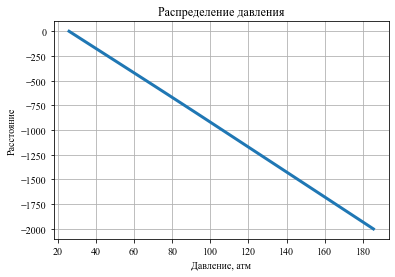

In [4]:
mpl.rcParams['font.family'] = 'fantasy'
mpl.rcParams['font.fantasy'] = 'Times New Roman'

plt.grid(True)
plt.title('Распределение давления', color='black', family='fantasy')
plt.ylabel('Расстояние', color='black', family='fantasy')
plt.xlabel('Давление, атм', color='black', family='fantasy')
plt.plot(p1_atma_result, h11_result, linewidth=3)
plt.show()

<ipython-input-5-3e7e69b8c7d5>:7: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax_02 = plt.axes()


<function matplotlib.pyplot.show(*args, **kw)>

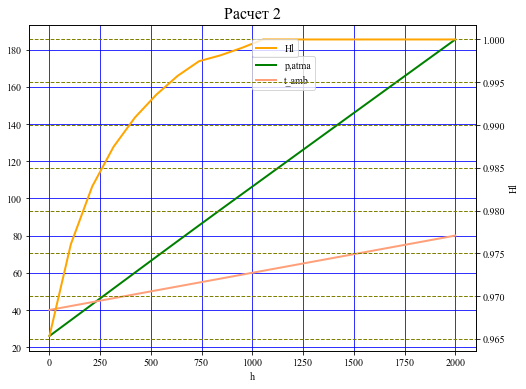

In [5]:
mpl.rcParams['figure.figsize'] = (8.0, 6.0)

ax_01 = plt.axes()
ax_01.plot(h12_result, p1_atma_result, 'green', label='p,atma', linewidth=2 )
ax_01.grid(color = 'b')
ax_01.set_xlabel(u'h')
ax_02 = plt.axes()
ax_02.plot(h12_result, t1_amb, 'lightsalmon',  label='t_amb', linewidth=2 )
ax_02.set_xlabel(u'h')
ax_03 = ax_02.twinx()
ax_03.plot(h12_result, Hl1_, 'orange', label='Hl', linewidth=2)
ax_03.set_ylabel(u'Hl')

ax_03.grid(which="major", linestyle="--", color="olive", linewidth=1)
ax_03.legend()
ax_03.legend(loc=(0.5, 0.90))
ax_02.legend()
ax_01.legend()
ax_02.legend(loc=(0.5, 0.80))
ax_01.set_title("Расчет 2", fontsize=16)
plt.show

In [6]:
PVT_corr_ = 0
gas_only_ = 0
Hydr_corr_ = 1
calibr_2_graw_ = 1 # меняет гравитационную составляющую градиента давления
calibr_2_fric_ = 1 # калибровка по трению
calibr_2_= [calibr_2_graw_, calibr_2_fric_ ]

raschet_2_vdol_ = 0
potoc_2_vdol_ = 0
calc_2_flow_derection_ = raschet_2_vdol_*10 + potoc_2_vdol_

# расчет добывающей скважины
result_2 = UniflocVBA.MF_p_pipe_atma(P_1, T_1, T_0, L_, theta_ , ID_, Ql_, fw_, Qgas_free_, PVT_str, calc_2_flow_derection_, Hydr_corr_, calibr_2_)
#rint (result_2 )
p2_atma_result = []
h21_result = []
h22_result = [] # глубина
t2_amb = [] # внешняя температура флюида
Hl2_ = [] # содержание жидкости в потоке 
di=1
num_ = np.arange (0, 20, di) #

for i in num_:
    p2_atma_result.append(result_2 [3+i][3])
    h21_result.append(-result_2 [3+i][1])
    h22_result.append(result_2 [3+i][1])
    t2_amb.append(result_2 [3+i][7])
    Hl2_.append(result_2 [3+i][5])

# функция калибровки расчета участка трубы
calibr_2_type_ = 1 # тип калибровки
calibr_2_ = UniflocVBA.MF_calibr_pipe(P_0,P_1,T_0, T_1, L_ , theta_ , ID_ , Ql_ , fw_ , Qgas_free_, PVT_str, calc_2_flow_derection_ , Hydr_corr_,calibr_2_ , 1 , calibr_1_type_)
print (calibr_2_)
    

(('no solution', 'calibr_fric', '0', '0', "solve_equation_bisection: values at segment's ends must have a different sign"), ('solution', 'cal_type', 'y_solution', 'iterations', 'description'))


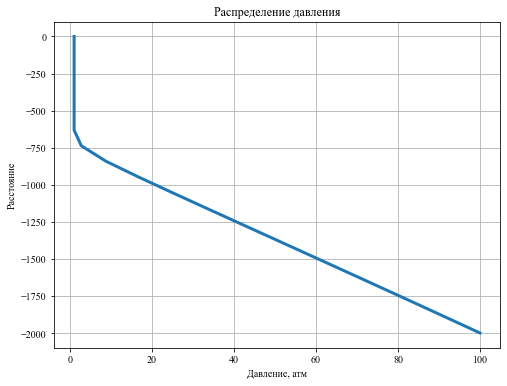

In [7]:

plt.grid(True)
plt.title('Распределение давления', color='black', family='fantasy')
plt.ylabel('Расстояние', color='black', family='fantasy')
plt.xlabel('Давление, атм', color='black', family='fantasy')
plt.plot(p2_atma_result, h21_result, linewidth=3)


plt.show()

<ipython-input-8-70647c73850a>:20: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax_02 = plt.axes()


<function matplotlib.pyplot.show(*args, **kw)>

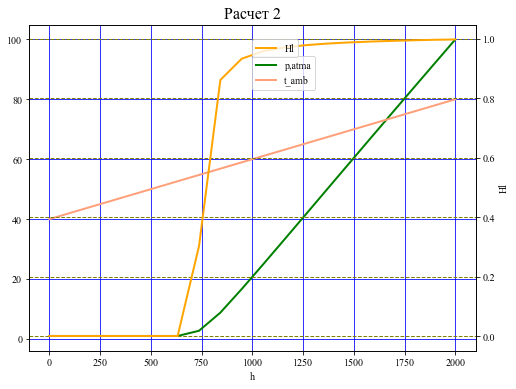

In [8]:
#ys2 = [p2_atma_result, t2_amb, Hl2_]
#for i in range(3):
#    plt.grid(True)
#    plt.title('Расчет 1', color='black', family='fantasy')
#    #plt.ylabel('Вязкость смеси, сП', color='black', family='fantasy')
#    #plt.xlabel('Давление, атм', color='black', family='fantasy')
#    plt.plot(h2_result, ys2[i], linewidth=3)
#plt.legend(('p,atma','t_amb', 'Hl')) 
#plt.show()


#import matplotlib as mpl
#import matplotlib.pyplot as plt
mpl.rcParams['figure.figsize'] = (8.0, 6.0)

ax_01 = plt.axes()
ax_01.plot(h22_result, p2_atma_result, 'green', label='p,atma', linewidth=2 )
ax_01.grid(color = 'b')
ax_01.set_xlabel(u'h')
ax_02 = plt.axes()
ax_02.plot(h22_result, t2_amb, 'lightsalmon',  label='t_amb', linewidth=2 )
ax_02.set_xlabel(u'h')
ax_03 = ax_02.twinx()
ax_03.plot(h22_result, Hl2_, 'orange', label='Hl', linewidth=2)
ax_03.set_ylabel(u'Hl')

ax_03.grid(which="major", linestyle="--", color="olive", linewidth=1)
ax_03.legend()
ax_03.legend(loc=(0.5, 0.90))
ax_02.legend()
ax_01.legend()
ax_02.legend(loc=(0.5, 0.80))
ax_01.set_title("Расчет 2", fontsize=16)
plt.show

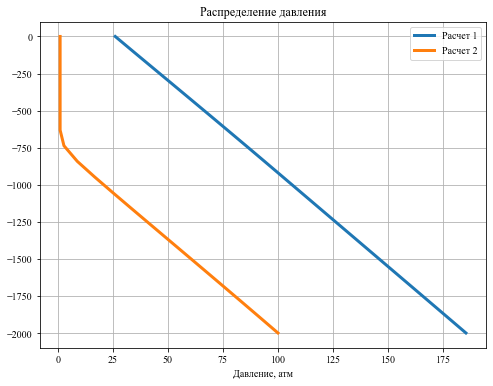

In [9]:
xs = [p1_atma_result, p2_atma_result]
for i in range(2):
    plt.grid(True)
    plt.title('Распределение давления', color='black', family='fantasy')
    plt.xlabel('Давление, атм', color='black', family='fantasy')
    plt.plot(xs[i], h21_result, linewidth=3)
plt.legend(('Расчет 1','Расчет 2')) 
plt.show()

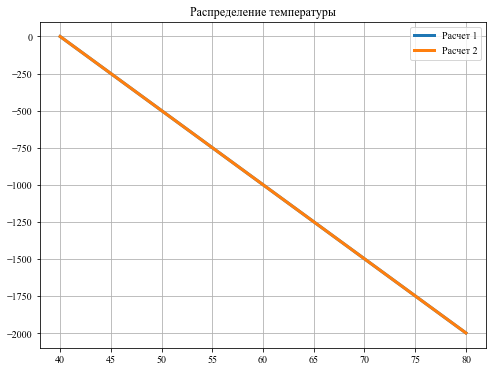

In [10]:
xs = [t1_amb, t2_amb]
for i in range(2):
    plt.grid(True)
    plt.title('Распределение температуры', color='black', family='fantasy')
    plt.plot(xs[i], h21_result, linewidth=3)
plt.legend(('Расчет 1','Расчет 2')) 
plt.show()